In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [192]:
data = pd.read_csv('r_JordanPeterson_General_Survey.csv')

# Clean and numerically code data
del data['Timestamp']
del data['How Can the Mods Help Make the Subreddit better?']
del data['How Can This Survey Be Improved in the Future?']
del data['Moderation on /r/JordanPeterson Is...']
del data[' What Is Your Career/Job?']

data.rename(index=str, columns={
    "How Do You Score in Openness": "Openness",
    'How Do You Score in Conscientiousness ': 'Conscientiousness',
    'How Do You Score in Extraversion': 'Extraversion',
    'How Do You Score in Agreeableness ': 'Agreeableness',
    'How Do You Score in Neuroticism': 'Neuroticism',
    'How Often Do You Clean Your Room?': 'Clean_room'}, inplace=True)

for i in data.select_dtypes(exclude=[np.number]).columns:
    vc = data[i].value_counts()
    common_responses = vc[vc > 1].index
    data[i] = np.where(data[i].isin(common_responses), data[i], i + '_Other')
    
edu = {
    "Bachelor's Degree": 4,
    'Current Undergraduate Student': 4,
    'Some College': 2,
    "Master's Degree": 6,
    'Current High School/Secondary Student': np.nan,
    'High School/Secondary School Graduate': 0,
    'PhD/Terminal Degree/JD': 8,
    'High School/Secondary School Dropout': -1,
    "Associate's Degree": 2
}

data['Education'] = data['Education'].map(edu)
data['Education'].fillna(data['Education'].median(), inplace=True)

cleaning = {
    'Weekly': 7,
    'Monthly': 30,
    'Every. Single. Day': 1,
    'There is a clear path from the bed to the door': 90,
    "Can't get in anymore, completely full of dead wood": 180,
}

data['Clean_room'] = data['Clean_room'].map(cleaning)

iq = {
    '121-130': 125,
    '131-140': 135,
    '111-120': 115,
    '141 and Above': 145,
    '101-110': 105,
    '91-100': 95,
    '80 and Below': 75,
    '81-90': 85
}

data['IQ'] = data['What is Your Approximate IQ (If you Know)'].astype(str).map(iq)
data['IQ'].fillna(data['IQ'].median(), inplace=True)
del data['What is Your Approximate IQ (If you Know)']

# Correlation matrix

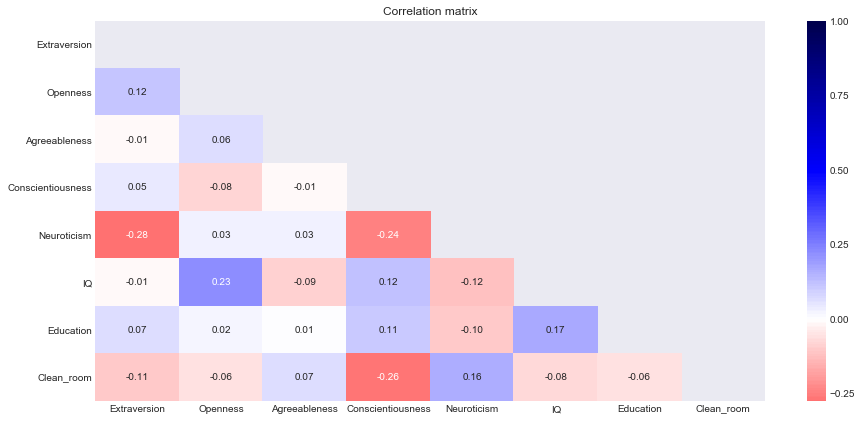

In [199]:
personality = data[[
    'Extraversion',
    'Openness',
    'Agreeableness',
    'Conscientiousness',
    'Neuroticism',
    'IQ',
    'Education',
    'Clean_room'
]]

mask = np.zeros_like(personality.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,7))
plt.title('Correlation matrix')
sns.heatmap(personality.corr(), annot=True, fmt='.2f', center=0, mask=mask, cmap='seismic_r')

In [200]:
for i in data.select_dtypes(exclude=[np.number]).columns:
    data[i] = data[i].replace(np.nan, i +' blank')

for i in data.select_dtypes(exclude=[np.number]).columns:
    new = pd.get_dummies(data[i], prefix=i)
    data = pd.concat([data,new], axis=1)
    
data = data.fillna(data.median())

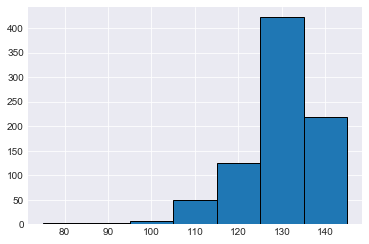

In [202]:
data['IQ'].hist(edgecolor='black', bins=7)

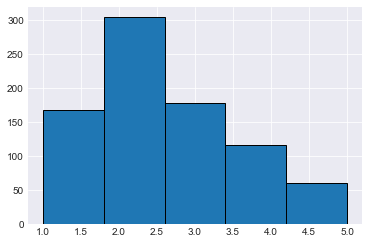

In [101]:
data['Extraversion'].hist(edgecolor='black', bins=5)

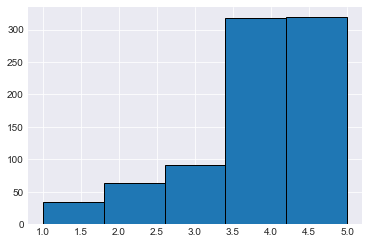

In [102]:
data['Openness'].hist(edgecolor='black', bins=5)

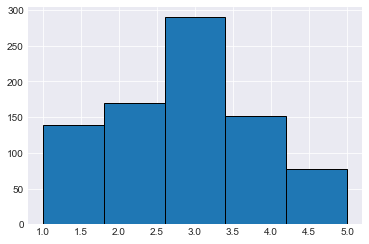

In [103]:
data['Agreeableness'].hist(edgecolor='black', bins=5)

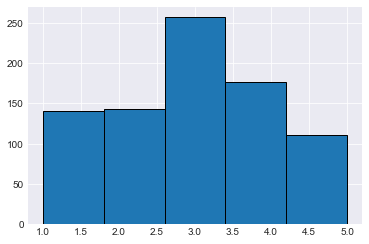

In [104]:
data['Conscientiousness'].hist(edgecolor='black', bins=5)

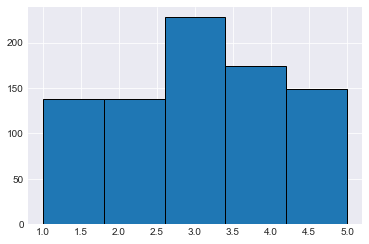

In [105]:
data['Neuroticism'].hist(edgecolor='black', bins=5)